# Toxic Comment Classification

### Description

The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.



In this competition, we’re challenged to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than Perspective’s current models. We’ll be using a dataset of comments from Wikipedia’s talk page edits. Improvements to the current model will hopefully help online discussion become more productive and respectful.

Disclaimer: the dataset for this competition contains text that may be considered profane, vulgar, or offensive.

Contest link: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

### Download Crawl - Fasttext Word Vectors

In [0]:
!wget --header="Host: dl.fbaipublicfiles.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://fasttext.cc/docs/en/english-vectors.html" --header="Cookie: __cfduid=d9bce14e3ad5d42528e65276ed8866b581579087931" --header="Connection: keep-alive" "https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip" -O "crawl-300d-2M.vec.zip" -c

--2020-02-06 11:04:09--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  47.8MB/s    in 30s     

2020-02-06 11:04:45 (47.8 MB/s) - ‘crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]



### Twitter Word Vectrors download

In [1]:
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.2.2034969121.1579138171; _gid=GA1.2.1181918881.1579138171; _gat=1" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip" -O "glove.twitter.27B.zip" -c

--2020-02-23 11:32:30--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  2.08MB/s    in 11m 41s 

2020-02-23 11:44:11 (2.07 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]



### Importing and extracting zip files

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('/content/crawl-300d-2M.vec.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('/content/glove.twitter.27B.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importing Libraries

In [4]:
import pandas as pd
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 1.x
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding,Dropout,Activation,GRU,Conv1D,CuDNNGRU,CuDNNLSTM
from keras.layers import SpatialDropout1D,MaxPool1D,GlobalAveragePooling1D,RepeatVector ,Add,PReLU
from keras.layers import Bidirectional, GlobalMaxPool1D,BatchNormalization,concatenate,TimeDistributed,Flatten
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import Adam,SGD,Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.core import Layer  
from keras import initializers, regularizers, constraints  
from keras import backend as K
from nltk.stem import SnowballStemmer


Using TensorFlow backend.


In [0]:
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

### Import Train and test

In [0]:
train_a = pd.read_csv('/content/drive/My Drive/self2/train.csv')
test_a = pd.read_csv('/content/drive/My Drive/self2/test.csv')

Objective:
To create an EDA/ feature-engineering starter notebook for toxic comment classification.

Data Overview:
The dataset here is from wiki corpus dataset which was rated by human raters for toxicity. The corpus contains 63M comments from discussions relating to user pages and articles dating from 2004-2015.

Different platforms/sites can have different standards for their toxic screening process. Hence the comments are tagged in the following five categories

### Check the number of comments that are clean below:

In [0]:
#We will use this to stratify our dataset later on
#del train['clean']
x= train.iloc[:,2:].sum(axis = 1)
train['clean'] = (x==0)
train['clean'] = train['clean'].astype(int)

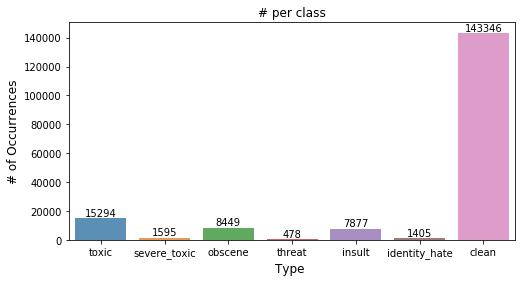

In [0]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [0]:
print("total number of clean comments is,",train['clean'].sum(axis = 0),"as percentage is ",float((train['clean'].sum(axis = 0))/train.shape[0]*100), "%")


total number of clean comments is, 143346 as percentage is  89.83211235124176 %


In [0]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
clean            False
dtype: bool

In [0]:
test.isnull().any()

id              False
comment_text    False
dtype: bool

### Text Preprocessing

In [0]:
def text_preprocess(text): 
    
    # Emoticons
    text = text.replace(":/", " bad ")
    text = text.replace(":&gt;", " sad ")
    text = text.replace(":')", " sad ")
    text = text.replace(":-(", " frown ")
    text = text.replace(":(", " frown ")
    text = text.replace(":s", " frown ")
    text = text.replace(":-s", " frown ")
    text = text.replace("&lt;3", " heart ")
    text = text.replace(":d", " smile ")
    text = text.replace(":p", " smile ")
    text = text.replace(":dd", " smile ")
    text = text.replace("8)", " smile ")
    text = text.replace(":-)", " smile ")
    text = text.replace(":)", " smile ")
    text = text.replace(";)", " smile ")
    text = text.replace("(-:", " smile ")
    text = text.replace("(:", " smile ")
    text = text.replace(":/", " worry ")
    text = text.replace(":&gt;", " angry ")
    text = text.replace(":')", " sad ")
    text = text.replace(":-(", " sad ")
    text = text.replace(":(", " sad ")
    text = text.replace(":s", " sad ")
    text = text.replace(":-s", " sad ")
    text = text.replace("fu ck", "fuck")
    # Shortforms   
    text = re.sub(r'[\w]*don\'t[\w]*','do not',text)
    text = re.sub(r'[\w]*i\'ll[\w]*','i will',text)
    text = re.sub(r'[\w]*wasn\'t[\w]*','was not',text)
    text = re.sub(r'[\w]*there\'s[\w]*','there is',text)
    text = re.sub(r'[\w]*i\'m[\w]*','i am',text)
    text = re.sub(r'[\w]*won\'t[\w]*','will not',text)
    text = re.sub(r'[\w]*let\'s[\w]*','let us',text)
    text = re.sub(r'[\w]*i\'d[\w]*','i would',text)
    text = re.sub(r'[\w]*they\'re[\w]*','they are',text)
    text = re.sub(r'[\w]*haven\'t[\w]*','have not',text)
    text = re.sub(r'[\w]*that\'s[\w]*','that is',text)
    text = re.sub(r'[\w]*couldn\'t[\w]*','could not',text)
    text = re.sub(r'[\w]*aren\'t[\w]*','are not',text)
    text = re.sub(r'[\w]*wouldn\'t[\w]*','would not',text)
    text = re.sub(r'[\w]*you\'ve[\w]*','you have',text)
    text = re.sub(r'[\w]*you\'ll[\w]*','you will',text)
    text = re.sub(r'[\w]*what\'s[\w]*','what is',text)
    text = re.sub(r'[\w]*we\'re[\w]*','we are',text)
    text = re.sub(r'[\w]*doesn\'t[\w]*','does not',text)
    text = re.sub(r'[\w]*can\'t[\w]*','can not',text)
    text = re.sub(r'[\w]*shouldn\'t[\w]*','should not',text)
    text = re.sub(r'[\w]*didn\'t[\w]*','did not',text)
    text = re.sub(r'[\w]*here\'s[\w]*','here is',text)
    text = re.sub(r'[\w]*you\'d[\w]*','you would',text)
    text = re.sub(r'[\w]*he\'s[\w]*','he is',text)
    text = re.sub(r'[\w]*she\'s[\w]*','she is',text)
    text = re.sub(r'[\w]*weren\'t[\w]*','were not',text)
    
    
    # Remove punct except ! and ?
    text = re.sub(r"[,.:|(;@)-/^—#&%$<=>`~{}\[\]\'\"]+\ *", " ", text)
    # Separate out ! and ?
    text = re.sub("!", " ! ", text)
    text = re.sub("\?", " ? ", text)
  
    # Drop numbers
    text = re.sub("\\d+", " ", text)
        
    # Check if at least 3 consecutive substrings are in caps. Add <caps> tag at the end
    counter = 0
    for substr in text.split():
        if (substr.isupper() == True):
            counter += 1
            if counter >=3:
                text = text + " " + "XYZ" # XYZ chosen for capitals since it is a rare word present in embedding
                counter = 0
        else:
            if counter >=3:
                text = text + " " + "XYZ"
                counter = 0
            else:
                counter = 0
    
    # Convert to lower
    text = text.lower()
    
    # Lots of words are not present in the fasttext embeddings. Replace them
    text = re.sub(r'[\w]*(fuc|fck|fvc|fuk|fucd)[\w]*','fuck',text)
    text = re.sub(r'[\w]*fag[\w]*','gay',text)
    text = re.sub(r'[\w]*gay[\w]*','gay',text)
    text = re.sub(r'[\w]*peni[\w]*','dick',text)
    text = re.sub(r'[\w]*(dic|dik)[\w]*','dick',text)
    text = re.sub(r'[\w]*bi[\w]*ch[\w]*','bitch',text)
    text = re.sub(r'[\w]*s[\w]*x[\w]*','sex',text)
    text = re.sub(r'[\w]*s[\w]*k[\w]*','suck',text)
    text = re.sub(r'[\w]*nigg[\w]*','suck',text)
    text = re.sub(r'[\w]*cock[\w]*','dick',text)
    text = re.sub(r'[\w]*cunt[\w]*','cunt',text)
    text = re.sub(r'[\w]*anal[\w]*','anal',text)
    text = re.sub(r'[\w]*ha{2,}[\w]*','haha',text)
    text = re.sub(r'[\w]*haha[\w]*','haha',text)
    text = re.sub(r'[\w]*wiki[\w]*','wikipedia',text)
    text = re.sub(r'[\w]*ency[\w]ia[\w]*','encyclopedia',text)   
           
    # Remove unwanted space
    text = " ".join(text.split())

    return text

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

sent = decontracted(train['comment_text'].values[100])

In [0]:
print(sent)

However, the Moonlite edit noted by golden daph was me (on optus ...)  Wake up wikkis.  So funny


In [0]:
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

In [0]:
print(sent)


However the Moonlite edit noted by golden daph was me on optus Wake up wikkis So funny


In [0]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### cleaning train data

In [0]:

clean_text_train = []
#s = re.compile(r'[^A-Za-z\.\-\?\!\,\#\@\% ]',re.IGNORECASE)
  
for i in train['comment_text'].values:
  sent = text_preprocess(i)
  sent = re.sub('[^A-Za-z0-9]+',' ', sent)
  
  sent = ' '.join(e for e in sent.split() if e not in stopwords and len(e)>1)
  clean_text_train.append(sent.lower().strip())

### Cleaning test data

In [0]:
clean_text_test = []
for i in test['comment_text'].values:
  sent = text_preprocess(i)
  sent = re.sub('[^A-Za-z0-9]+',' ', sent)
  
 
  
  sent = ' '.join(e for e in sent.split() if e not in stopwords and len(e)>1)
  clean_text_test.append(sent.lower().strip())


In [0]:
train['comment_text'] = clean_text_train
test['comment_text'] = clean_text_test

### Building the vocabulary for the model to learn from

In [0]:
def build_vocab(sentences,verbose = True):
  vocab = {}
  for sentance in tqdm(sentences, disable = (not verbose)):
    for word in sentance:
      try :
        vocab[word]+=1
      except KeyError:
        vocab[word] =1
  return vocab

In [0]:
from tqdm import tqdm
sentences = train['comment_text'].apply(lambda x:x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})

100%|██████████| 159571/159571 [00:01<00:00, 104572.28it/s]

{'explanation': 1771, 'edits': 9995, 'made': 9685, 'username': 1826, 'hardcore': 167}


In [0]:
from gensim.models import KeyedVectors

news_path = '/content/crawl-300d-2M.vec'
embeddings_index = KeyedVectors.load_word2vec_format(news_path, binary=True,unicode_errors='ignore')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import operator 
def check_coverage(vocab,embeddings_index):
  a = {}
  oov = {}
  k = 0
  i = 0
  for word in tqdm(vocab):
    try:
      a[word] = embeddings_index[word]
      k+=vocab[word]
    except:
      oov[word] = vocab[word]
      i+=vocab[word]
      pass
  print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
  print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
  sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

  return sorted_x

In [0]:
oov = check_coverage(vocab,embeddings_index)

100%|██████████| 161625/161625 [00:00<00:00, 489674.14it/s]

Found embeddings for 0.64% of vocab
Found embeddings for  6.85% of all text


In [0]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec 
glove_file = datapath('/content/glove.twitter.27B.200d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
embeddings_index = KeyedVectors.load_word2vec_format(tmp_file)

 #= KeyedVectors.load_word2vec_format(news_path, binary=True,unicode_errors='ignore')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import operator 
def check_coverage(vocab,embeddings_index):
  a = {}
  oov = {}
  k = 0
  i = 0
  for word in tqdm(vocab):
    try:
      a[word] = embeddings_index[word]
      k+=vocab[word]
    except:
      oov[word] = vocab[word]
      i+=vocab[word]
      pass
  print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
  print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
  sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

  return sorted_x

In [0]:
oov = check_coverage(vocab,embeddings_index)

100%|██████████| 161625/161625 [00:00<00:00, 349651.35it/s]


Found embeddings for 48.68% of vocab
Found embeddings for  96.66% of all text


In [0]:
lll = np.where(train['comment_text'].str.contains('oldid'))

In [0]:
lll

(array([   868,   1175,   2336,   3304,   3996,   4440,   5122,   5720,
          5969,   6622,   7970,  10847,  11185,  11430,  11591,  12416,
         13326,  13849,  14407,  14498,  14630,  15288,  15301,  15457,
         15508,  15908,  16075,  16806,  18046,  18717,  19190,  20017,
         21140,  21352,  22736,  23361,  24869,  25539,  25585,  25814,
         25885,  26373,  26651,  26892,  27500,  28136,  28377,  28461,
         29515,  29524,  29972,  30681,  30943,  31431,  32015,  32154,
         34083,  34201,  34299,  34445,  35306,  38032,  38583,  39126,
         40033,  40171,  40388,  41383,  41609,  41762,  41869,  42131,
         42245,  42262,  45164,  46021,  46249,  47252,  48228,  48357,
         48445,  48559,  49232,  49366,  49447,  49793,  50002,  50198,
         50371,  50833,  51375,  52297,  52329,  53628,  54331,  55570,
         55609,  55624,  55891,  56815,  57326,  57983,  58452,  59555,
         60032,  61167,  61503,  61904,  61991,  62209,  62730, 

In [0]:
train.iloc[868,1]

'seems insistent adding pointless rambling talk page forum make cut http bad en wikipedia org index php title talk axm rifle diff oldid keeps reverting removal'

In [0]:
train_a.iloc[868,1]

"He's at it again. He seems insistent on adding pointless rambling on how the talk page isn't a forum just so he can make a cut at me.\n\nhttp://en.wikipedia.org/w/index.php?title=Talk%3AXM8_rifle&diff;=193022803&oldid;=192967373\n\nHe keeps reverting my removal of it."

In [0]:
lll

(array([    10,    460,    484,    854,   1820,   4490,   4759,   6393,
          7146,   7239,   7269,   7671,   8197,   8278,   8539,   8832,
          9268,   9669,  10143,  10677,  10880,  11099,  11524,  12435,
         13520,  13806,  15122,  15249,  15276,  15565,  17096,  17255,
         18056,  18254,  20136,  20612,  21166,  22037,  22183,  22311,
         23288,  23689,  23889,  24721,  24984,  26356,  26384,  27259,
         27787,  27821,  27924,  28284,  28288,  28289,  28336,  28410,
         28479,  28967,  29274,  29797,  29882,  30035,  31148,  31866,
         32471,  32590,  32649,  33103,  34536,  34591,  34744,  35256,
         35965,  36225,  36248,  36487,  36569,  38210,  38667,  38698,
         39388,  39916,  40418,  40574,  40994,  41123,  41433,  41530,
         41595,  41622,  41816,  42554,  42978,  43107,  43439,  43553,
         44051,  44320,  44542,  45424,  45724,  46390,  46502,  46530,
         46761,  46812,  47524,  47550,  48122,  48534,  49825, 

In [0]:
oov[:50]

[('contribs', 2706),
 ('npov', 1872),
 ('infobox', 1075),
 ('barnstar', 1034),
 ('unsourced', 916),
 ('disambiguation', 774),
 ('fffa', 713),
 ('arbcom', 650),
 ('verifiability', 633),
 ('yourselfgo', 621),
 ('userpage', 597),
 ('talkpage', 534),
 ('mothjer', 489),
 ('gfdl', 457),
 ('oldid', 433),
 ('philippineslong', 420),
 ('cellpadding', 373),
 ('unconstructive', 353),
 ('deneid', 331),
 ('deletions', 320),
 ('pagedelete', 312),
 ('notrhbysouthbanof', 308),
 ('mainpagebg', 304),
 ('adminship', 299),
 ('criminalwar', 279),
 ('bunksteve', 278),
 ('checkuser', 274),
 ('conformance', 274),
 ('copyvio', 261),
 ('boymamas', 258),
 ('ytmnd', 250),
 ('ffffff', 246),
 ('reversions', 242),
 ('unreferenced', 218),
 ('youbollocks', 217),
 ('incivility', 215),
 ('concernthanks', 212),
 ('turkic', 210),
 ('delanoy', 205),
 ('nhrhs', 195),
 ('sitush', 193),
 ('cellspacing', 190),
 ('ullmann', 186),
 ('userspace', 181),
 ('subsection', 181),
 ('centraliststupid', 179),
 ('macedonians', 178),
 ('inf

In [0]:
def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re
  

In [0]:
mispell_dict = {'contribs':'contributions',
                'npov':'point of view',
                'infobox':'information box',
                'barnstar':'barn star',
                'unsourced':'not source',
                'disambiguation':'not ambiguous',
                'fffa':'fuck',
                'arbcom':'arbitration committee',
                'verifiability':'verify',
                'yourselfgo':'yourself go',
                'userpage':'user page',
                'talkpage':'talk page',
                'mothjer':'mother',
                'gfdl':'free',
                'oldid':'link',
                'philippineslong': 'philippine king',
                'cellpadding': 'cell padding',
                'unconstructive': 'not constructive',
                'deneid':'deny',
                'deletions': 'delete',
                'pagedelete':'page delete',
                'notrhbysouthbanof':'not by south',
                'mainpagebg': 'main page',
                'adminship':'admin',
                'criminalwar':'criminal war',
                'ffffff':'fuck'

                }
mispellings, mispellings_re = _get_mispell(mispell_dict)

In [0]:
def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

In [0]:
train["comment_text"] = train["comment_text"].apply(lambda x: replace_typical_misspell(x))
sentences = train["comment_text"].apply(lambda x: x.split())
to_remove = ['a','to','of','and']
sentences = [[word for word in sentence if not word in to_remove] for sentence in tqdm(sentences)]
vocab = build_vocab(sentences)

100%|██████████| 159571/159571 [00:01<00:00, 108226.51it/s]


In [0]:
oov = check_coverage(vocab,embeddings_index)


100%|██████████| 161579/161579 [00:00<00:00, 356188.01it/s]


Found embeddings for 48.70% of vocab
Found embeddings for  96.96% of all text


### Increase vocabulary fed to a model

In [0]:
#Tried to increase vocabulary of the model. Didn't work
'''def translate(comment, language):
    if hasattr(comment, "decode"):
        comment = comment.decode("utf-8")

    text = TextBlob(comment)
    try:
        text = text.translate(to=language)
        text = text.translate(to="en")
    except NotTranslated:
        pass

    return str(text)

def main():
    

    
    languages = ["es", "de", "fr"]
    
    comments_list = train["comment_text"].str.lower().fillna('something').values

    if not os.path.exists("/content/drive/My Drive/"):
        os.mkdir("/content/drive/My Drive/")

    parallel = Parallel(n_jobs = -1,backend="threading", verbose=5)
    for language in languages:
        print('Translate comments using "{0}" language'.format(language))
        translated_data = parallel(delayed(translate)(comment, language) for comment in comments_list)
        train["comment_text"] = translated_data

        result_path = os.path.join(args.result_path, "train_" + language + ".csv")
        train.to_csv(result_path, index=False)


if __name__ == "__main__":
    main()'''

### Modeling on Twitter embeddings

In [0]:
max_features = 100000
maxlen = 150
embed_size = 200
batch_size = 128
n_splits = 10

In [0]:
import time
start_time = time.time()
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import sys, os, re, csv, codecs, numpy as np, pandas as pd
np.random.seed(32)
os.environ["OMP_NUM_THREADS"] = "4"
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
os.environ['OMP_NUM_THREADS'] = '4'
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import Callback


max_features = 272330
maxlen = 150
embed_size = 200
batch_size = 2048
n_splits = 4


# Classs for evaluating the metric
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch, score))
    

### Vectorize the vocabulary and form word vectors.

In [0]:
#Load embedding file, seperate train and test classes
EMBEDDING_FILE='/content/glove.twitter.27B.200d.txt'
train = pd.read_csv('/content/drive/My Drive/self2/train.csv')
test = pd.read_csv('/content/drive/My Drive/self2/test.csv')

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
    
    
    
    
# load Clean text
train['comment_text'] = clean_text_train
test['comment_text'] = clean_text_test


# Vectorize comments
list_sentences_train = train["comment_text"].str.lower().fillna("_na_").values
list_sentences_test = test["comment_text"].str.lower().fillna("_na_").values
    
tokenizer = Tokenizer(num_words = max_features, lower = True,filters='"#$%&()*+,-./:;=@[\\]^_`“<>{|}~\t\n') # not filtering out ! and ?, < >
# Fit on both train and test to take all the vocabulary
# People will question why take test. it is exposing to a wider vocabulary                      
tokenizer.fit_on_texts(list(list_sentences_train)+list(list_sentences_test))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
#padding the sequences to a maxlen of 150 per comment
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
#Load word vector
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')    
embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(EMBEDDING_FILE, encoding='utf-8'))
 

In [0]:
word_index = tokenizer.word_index
len(word_index)

272337

In [0]:
# creare embedding matrix
nb_words = min(max_features, len(word_index)) 
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
    # we need to create a matrix for each word in the dataset - embedding matrix

In [0]:
# use stratified k folds to split data into train and test
# we are using stratified k folds in htis case because train_test_split won't work
folds = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state=25)
oof = np.empty([len(X_t),len(list_classes)])
sub_preds = np.zeros([len(X_te),len(list_classes)])
foldwise_auc = [] 

In [0]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Concatenate

In [0]:
#ttps://www.kaggle.com/ogrellier/kfold-or-stratifiedkfold
#https://www.kaggle.com/christofhenkel/inceptioncnn-with-flip
#https://www.kaggle.com/c/quora-insincere-questions-classification/discussion/79911
# triain the model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(y[:,0], y[:,0])): #StratifiedKFold expects array of shape (n,)
    filter_sizes = [1,2,3,5]
  
    X_train, y_train = X_t[trn_idx], y[trn_idx]
    X_val, y_val = X_t[val_idx], y[val_idx]
    num_filters = 36    
    print("Running fold %d" % fold_)     
        
    ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval=1)
    earlystop = EarlyStopping(monitor='val_loss', mode="min", patience=5, verbose=1) 
        
    def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
        inp = Input(shape = (maxlen,))
        x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
        
        x = SpatialDropout1D(dr)(x)
        conv_0 = Conv1D(num_filters, kernel_size=(filter_sizes[0]),
                                 kernel_initializer='he_normal', activation='elu')(x)
        conv_1 = Conv1D(num_filters, kernel_size=(filter_sizes[1]),
                                 kernel_initializer='he_normal', activation='elu')(x)
        conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[2]), 
                                 kernel_initializer='he_normal', activation='elu')(x)
        conv_3 = Conv1D(num_filters, kernel_size=(filter_sizes[3]),
                                 kernel_initializer='he_normal', activation='elu')(x)

        maxpool_0 = MaxPool1D(pool_size=(maxlen - filter_sizes[0] + 1))(conv_0)
        maxpool_1 = MaxPool1D(pool_size=(maxlen - filter_sizes[1] + 1))(conv_1)
        maxpool_2 = MaxPool1D(pool_size=(maxlen - filter_sizes[2] + 1))(conv_2)
        maxpool_3 = MaxPool1D(pool_size=(maxlen - filter_sizes[3] + 1))(conv_3)

        z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
        z = Flatten()(z)
        z = BatchNormalization()(z)
        outp = Dense(6, activation="sigmoid")(z)
        


        
            
        model = Model(inputs = inp, outputs = outp)
        model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
        model.fit(X_train, y_train, batch_size = 512, epochs = 4, validation_data = (X_val, y_val), 
                                verbose = 1, callbacks = [ra_val, earlystop])
            
        return model
                                         
    model = build_model(lr = 1e-3, lr_d = 0, units = 144, dr = 0.2)
        
    pred = model.predict(X_val, batch_size = 1024, verbose = 1)       
    #Save model after every epoch   
    filename = '/content/drive/My Drive/twitter_' + str(fold_) + '.h5'   
    model.save(filename)
    oof[val_idx] = pred
        
    sub_preds += model.predict([X_te], batch_size=1024, verbose=1) / n_splits
            
auc=0
for i in range(len(list_classes)):
    auc += roc_auc_score(y[:,i], oof[:,i]) / len(list_classes)
    
print("AUC for full run: %.6f" % auc)
    
validation = pd.DataFrame(oof, columns = list_classes)
validation.to_csv('validation_fasttext_bgrucnn.csv', index=False) 
    
submission = pd.concat([test['id'], pd.DataFrame(sub_preds, columns = list_classes)], axis=1)
submission.to_csv('submission_fasttext_bgrucnn.csv', index=False) 

Running fold 0










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 119678 samples, validate on 39893 samples
Epoch 1/4
119678/119678 [==============================] - 13s 109us/step - loss: 0.3112 - acc: 0.8706 - val_loss: 0.0642 - val_acc: 0.9799

 ROC-AUC - epoch: 0 - score: 0.953532
Epoch 2/4
119678/119678 [==============================] - 6s 49us/step - loss: 0.0609 - acc: 0.9801 - val_loss: 0.0533 - val_acc: 0.9811

 ROC-AUC - epoch: 1 - score: 0.971827
Epoch 3/4
119678/119678 [==============================] - 6s 49us/step - loss: 0.0514 - acc: 0.9816 - val_loss: 0.0512 - val_acc: 0.9816

 ROC-AUC - epoch: 2 - score: 0.975613
Epoch 4/4
119678/119678 [==============================] - 6s 49us/step - loss: 0.0474 - acc: 0.9825 - val_loss: 0.0506 - val_acc: 0.9815

 ROC-AUC - epoch: 3 - score: 0.976782

## Summary

- This Case study involves classifying a text to one of the 6 classes :- Toxic, Severe_toxic, Obscene, Threat, Insult, Identity_hate.
- I decided to use the Fasttext and twitter word vectors to try and model the vocabulary of the comment.
- I imported the dataset to check for the number of comments under each class checked for any null values. The total number of clean comments are 89% approx.
- I then used some simple regex to clean the train and text data to make the comments as simmilar as possible without changing the meaning of the sentence.
- I also tried to extend the vocabulary by translating the sentences to a different language and translating them back to english. The idea is that this would expose the model to a larger vocabulary. This could not work as google translate api doesn't allow translating beyond a certain limit for free.
- I also tried manual find and replace for words that had the same meaning but different spellings. This was all done in part to clean the test as much as posisible. Problems like these boil down to the quality of the dataset.
- After this, I checked which word vectors account for the maximum amount of vocabulary in the dataset. Fast-text word vectors could only account for a measly 0.64% of the entire vocabulary, whereas twitter word vectors could account for around 48% of the vocabulary. Hence the embedding matrix was created using the twitter word vectors.
- A deep learning model using Convolution layers was built and ROC-AUC score was used as a performance metric. The Kaggle dashboard gave the best value of ROC-AUC score as 98.12 which is a top 50% solution.
